# DA Final project: Sleep Efficiency

# Group: 40 

# Going Of The Rails

####  Name of students:
##### Roy Ashkenazi<br>
##### Zohar Kulp<br>
##### Oz Kenner<br>



<a id='top'></a>

<div>
<img src="https://github.com/RoidoAsh/project1/blob/main/sleep-share-card.jpeg?raw=true" width="800"/>
</div>


#### https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency/data -LINK TO OUR DATA ON KAGGLE

### Backround about our data

Our dataset includes information on sleep habits like how long people sleep, how often they wake up, sleep quality, and their use of caffeine and alcohol, collected from people with different bedtimes.

# <b id="section_2">  </b> <b style='color:#F05454'> Relevant libraries </b> <b></b> 

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
from datetime import date
#import matplotlib as mpl
import plotly.graph_objects as go

In [81]:
url = 'https://raw.githubusercontent.com/RoidoAsh/project1/main/Sleep_Efficiency.csv'
Sleep_Efficiency = pd.read_csv(url)

In [82]:
Sleep_Efficiency.shape

(452, 15)

In [83]:
Sleep_Efficiency.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [84]:
Sleep_Efficiency.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [85]:
Sleep_Efficiency.dtypes

ID                          int64
Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
dtype: object

# <b id="section_2">  </b> <b style='color:#F05454'> Checking missing values: </b> <b></b> 

In [86]:
Sleep_Efficiency.isnull().sum().sort_values()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Smoking status             0
Exercise frequency         6
Alcohol consumption       14
Awakenings                20
Caffeine consumption      25
dtype: int64

### convert types to differnet formates

We will convert the 'Bedtime' and 'Wakeup time' columns to datetime format, fill any missing values in the 'Exercise frequency' column with 0, and change its data type to integer

In [87]:
Sleep_Efficiency['Bedtime'] = pd.to_datetime(Sleep_Efficiency['Bedtime'], format='%Y-%m-%d %H:%M:%S')
Sleep_Efficiency['Wakeup time'] = pd.to_datetime(Sleep_Efficiency['Wakeup time'], format='%Y-%m-%d %H:%M:%S')

In [88]:
Sleep_Efficiency['Exercise frequency'].fillna(0, inplace=True)
Sleep_Efficiency['Exercise frequency'] = Sleep_Efficiency['Exercise frequency'].astype(int)
Sleep_Efficiency.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3


We will create a new column named Smoke_stat_by_num to convert the Smoking status column into a numerical format, where 'Yes' will be represented as 1 and 'No' as 0.

In [89]:
Sleep_Efficiency['Smoke_stat_by_num'] = Sleep_Efficiency['Smoking status'].apply(lambda x: 1 if x == 'Yes' else 0)

We will use a Heatmap to map correlations between numeric features that we want to dig into. 


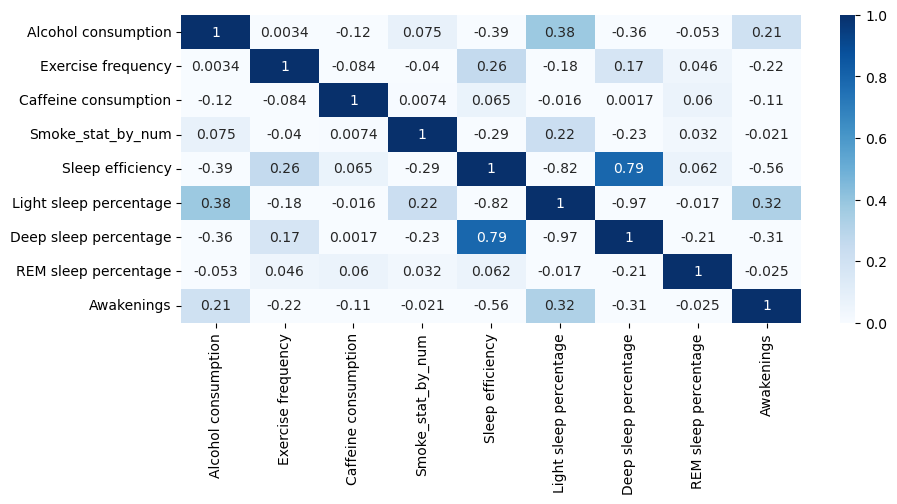

In [90]:
features1 = ['Alcohol consumption','Exercise frequency','Caffeine consumption','Smoke_stat_by_num','Sleep efficiency','Light sleep percentage','Deep sleep percentage','REM sleep percentage','Awakenings']
correlation_matrix = Sleep_Efficiency[features1].corr()
plt.figure(figsize=(10,4))
sns.heatmap(correlation_matrix,vmin=0 , vmax = 1,cmap='Blues' , annot=True);

## <span style="color:blue"> Conclusion 1: The effect of alcohol on our four stages of sleep, according to men and women </span>

<a id='top'></a>
<div>
<img src="https://github.com/RoidoAsh/project1/blob/main/Quick-Guide-to-Sleep-Stages.png?raw=true" width="1000"/>
</div>

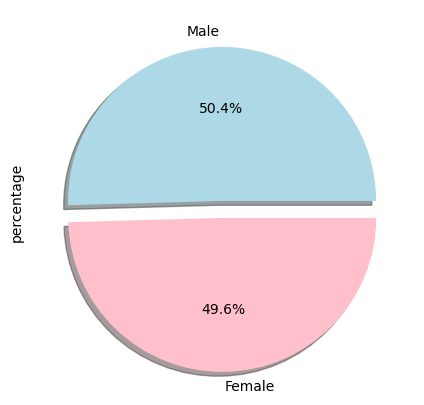

In [91]:
plt.figure(figsize=(15,5))
Sleep_Efficiency['Gender'].value_counts().plot.pie(autopct='%1.1f%%', shadow = True, explode = (0.01, 0.1), colors = ['lightblue', 'pink'])
plt.ylabel('percentage')
plt.show()

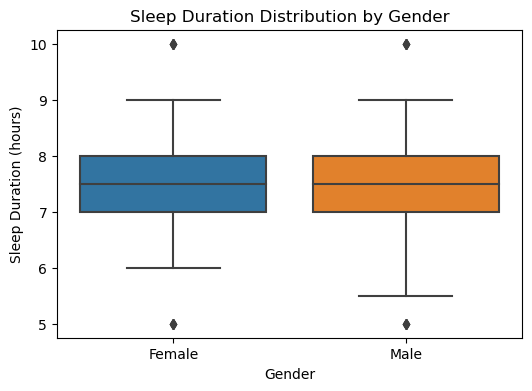

In [92]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Sleep duration', data=Sleep_Efficiency)
plt.title('Sleep Duration Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Sleep Duration (hours)')
plt.show()

In [93]:
Sleep_Efficiency['Alcohol consumption category'] = Sleep_Efficiency['Alcohol consumption'].apply(lambda x: 'Consumer' if x > 0 else 'Non-consumer')

In [94]:
consumers_data = Sleep_Efficiency[Sleep_Efficiency['Alcohol consumption category'] == 'Consumer']
alcohol_consumption_counts = consumers_data.groupby(['Gender']).size().reset_index(name='Counts')

In [95]:
alcohol_consumption_counts

,Gender,Counts
0,Female,100
1,Male,92


In [96]:
# Sleep_Efficiency['Gender'].replace([0, 1], ['Female', 'Male'], inplace=True)

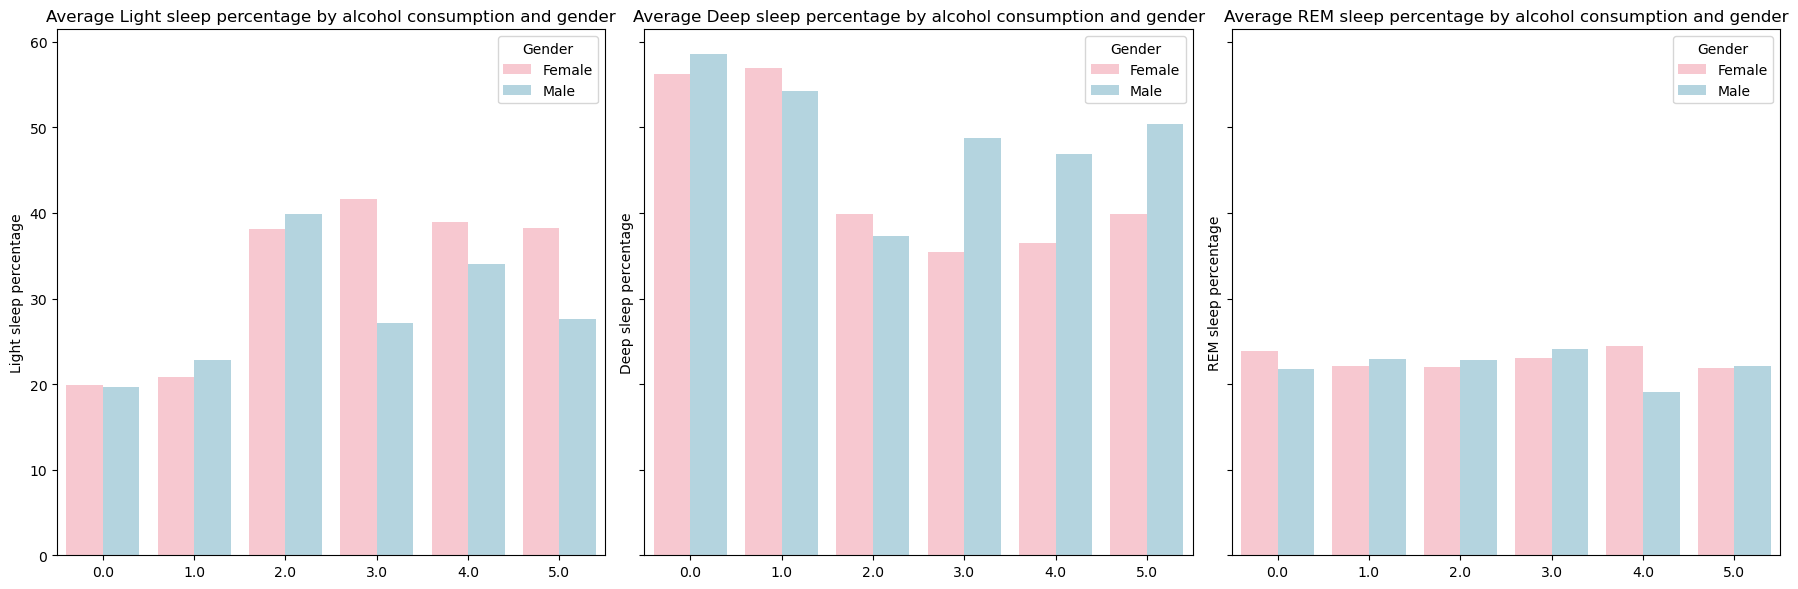

In [97]:
palette = {'Female': 'pink', 'Male': 'lightblue'}
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.barplot(x="Alcohol consumption", y="Light sleep percentage", hue="Gender", palette=palette, errorbar=None, data=Sleep_Efficiency, ax=axes[0])
axes[0].set_title("Average Light sleep percentage by alcohol consumption and gender")
axes[0].set_xlabel("")
axes[0].set_ylabel("Light sleep percentage")

sns.barplot(x="Alcohol consumption", y="Deep sleep percentage", hue="Gender", palette=palette, errorbar=None, data=Sleep_Efficiency, ax=axes[1])
axes[1].set_title("Average Deep sleep percentage by alcohol consumption and gender")
axes[1].set_xlabel("")
axes[1].set_ylabel("Deep sleep percentage")

sns.barplot(x="Alcohol consumption", y="REM sleep percentage", hue="Gender", palette=palette, errorbar=None, data=Sleep_Efficiency, ax=axes[2])
axes[2].set_title("Average REM sleep percentage by alcohol consumption and gender")
axes[2].set_xlabel("")
axes[2].set_ylabel("REM sleep percentage")

plt.tight_layout()
plt.show()

##### We see that female and male who consum over 3 oz (90 ml) stay in the same pattern

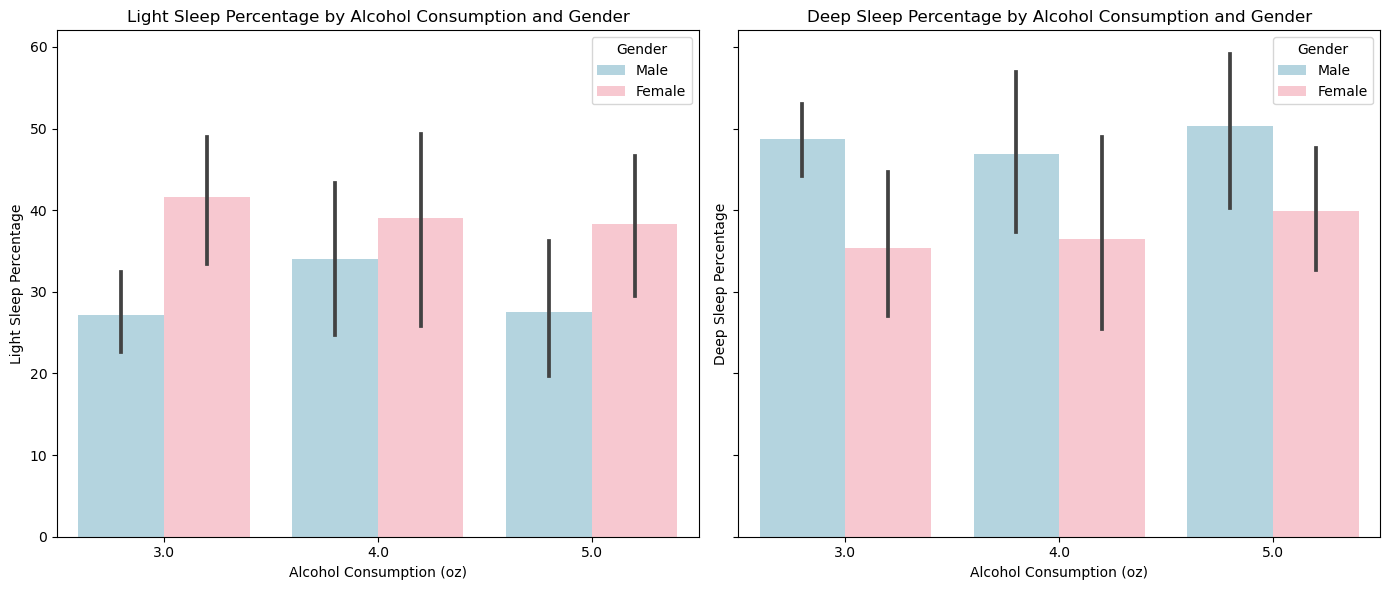

In [98]:
filtered_data = Sleep_Efficiency[Sleep_Efficiency['Alcohol consumption'].isin([3, 4, 5])]
palette = {'Female': 'pink', 'Male': 'lightblue'}
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(x="Alcohol consumption", y="Light sleep percentage", hue="Gender", palette=palette, data=filtered_data, ax=axes[0],edgecolor=None)
axes[0].set_title("Light Sleep Percentage by Alcohol Consumption and Gender")
axes[0].set_xlabel("Alcohol Consumption (oz)")
axes[0].set_ylabel("Light Sleep Percentage")

sns.barplot(x="Alcohol consumption", y="Deep sleep percentage", hue="Gender", palette=palette, data=filtered_data, ax=axes[1],edgecolor=None)
axes[1].set_title("Deep Sleep Percentage by Alcohol Consumption and Gender")
axes[1].set_xlabel("Alcohol Consumption (oz)")
axes[1].set_ylabel("Deep Sleep Percentage")

plt.tight_layout()
plt.show()

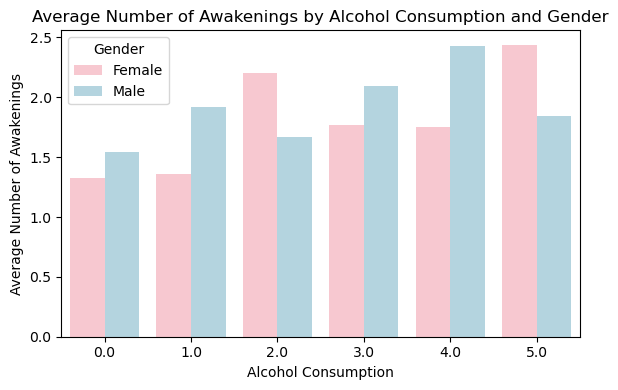

In [99]:
palette = {'Female': 'pink', 'Male': 'lightblue'}

plt.figure(figsize=(6, 4))
sns.barplot(x="Alcohol consumption", y="Awakenings", hue="Gender", palette=palette, data=Sleep_Efficiency, errorbar=None)
plt.title("Average Number of Awakenings by Alcohol Consumption and Gender")
plt.xlabel("Alcohol Consumption")
plt.ylabel("Average Number of Awakenings")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

##### People who drink alcohol tend to wake up more often during the night, regardless of whether they are male or female.

In [100]:
filtered_Eff = Sleep_Efficiency[Sleep_Efficiency['Alcohol consumption'] > 3]
average_sleep_quality = filtered_Eff.groupby('Gender')['Sleep efficiency'].mean().reset_index()
average_sleep_quality.columns = ['Gender', 'Average Sleep Quality']
average_sleep_quality

,Gender,Average Sleep Quality
0,Female,0.661250
1,Male,0.712759


### <span style="color:blue"> Observation 1:</span>
We observe the effects of alcohol consumption on sleep stages according to gender. Our data indicates that women who consume over 90 ml of alcohol spend most of their sleep in light sleep, whereas men consuming the same amount tend to spend more time in deep sleep.

Regarding the REM sleep stage, there is no significant difference between men and women. According to online research, "Healthy adults should expect to spend about 20-25% of their total time asleep in REM sleep, while infants spend around 50% of their sleep in REM." In our data, both men and women spend about 20-25% of their sleep time in REM sleep, even when consuming alcohol.

The more alcohol male and female consume, the more likely they are to wake up at night

## <span style="color:green"> Conclusion 2: Connections between Exercise, smoking status and Sleep efficiency by age groups</span>

<a id='top'></a>
<div>
<img src="https://github.com/RoidoAsh/project1/blob/main/smoking%20and%20running.jpg?raw=true" width="1000"/>
</div>

#### We will use a map correlations between the columns we want to dig in too and see if there is connections.

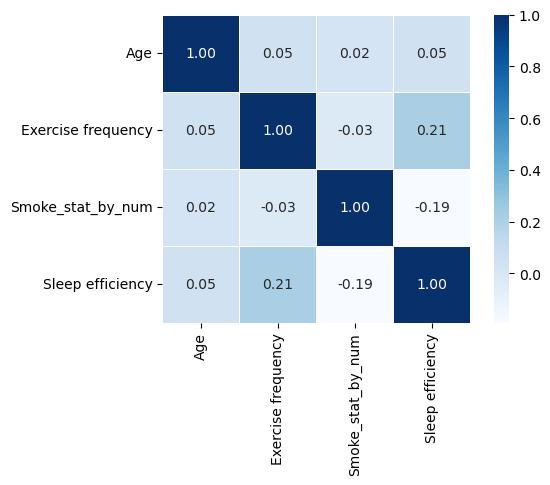

In [101]:
features = ['Age', 'Exercise frequency', 'Smoke_stat_by_num', 'Sleep efficiency']
correlation_matrix = Sleep_Efficiency[features].corr(method='kendall').round(2)
plt.figure(figsize=(6, 4))
sns.heatmap(data=correlation_matrix, annot=True, cmap='Blues', cbar=True, square=True, fmt='.2f', linewidths=0.5)
plt.show()

We will create a 'Age category' column according to our age groups.

Working on Exercise frequency by 'Age category' + whether it improves Sleep efficiency :

In [102]:
bins = [0, 25, 45, 65, float('inf')]
labels = ['0-24', '25-44', '45-65', '65+']

Sleep_Efficiency['Age Category'] = pd.cut(Sleep_Efficiency['Age'], bins=bins, labels=labels, right=False)

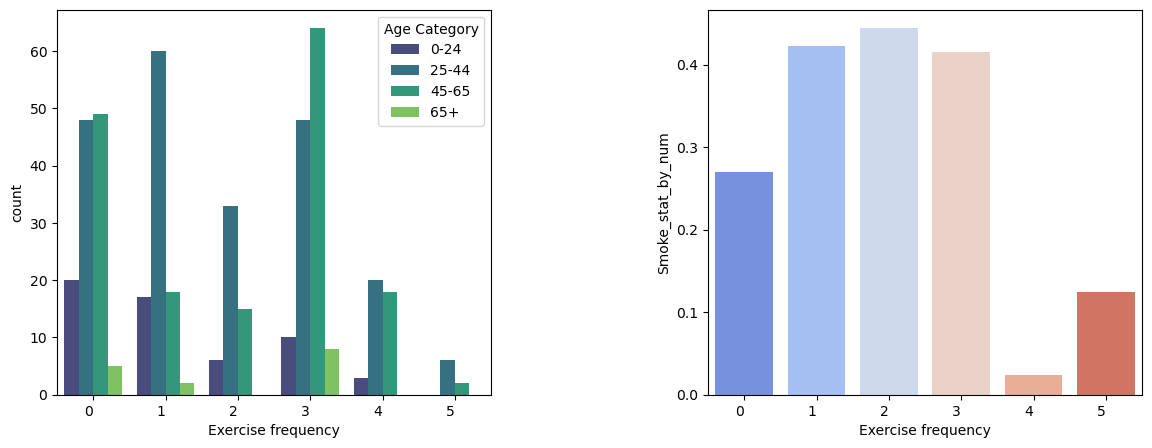

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=Sleep_Efficiency, x='Exercise frequency', hue='Age Category',palette='viridis', ax=ax[0])
sns.barplot(data = Sleep_Efficiency, x='Exercise frequency',  y = "Smoke_stat_by_num",palette='coolwarm', errorbar=None, ax = ax[1])  

ax[0].set_xticklabels(ax[0].get_xticklabels(), ha='right', rotation_mode='anchor')
ax[1].set_xticklabels(ax[1].get_xticklabels(), ha='right', rotation_mode='anchor')   

plt.subplots_adjust(wspace=0.5)

ax[0].set_xlabel('Exercise frequency')
ax[1].set_xlabel('Exercise frequency')

ax[0].legend(title='Age Category', loc='upper right')
plt.show()

we can see that in the age group 45-65, exercising three times a week is a common frequency. We will examine whether individuals in this age group who exercise three times a week are smokers and value their sleep efficiency to gain further insights.

In the right graph we can see that the majority of the people who smoke exercise between 1-3 times a week.

In [104]:
exercise_frequency_summary = Sleep_Efficiency.groupby('Age Category', observed=True)['Exercise frequency'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()
exercise_frequency_summary.columns = ['Age Category', 'Most common exercise frequency']

In [105]:
exercise_frequency_summary

,Age Category,Most common exercise frequency
0,0-24,0
1,25-44,1
2,45-65,3
3,65+,3


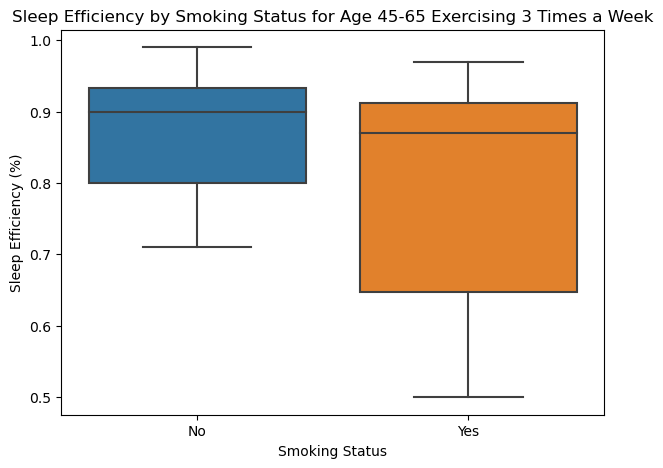

In [106]:
filtered_data = Sleep_Efficiency[(Sleep_Efficiency['Age Category'] == '45-65') & (Sleep_Efficiency['Exercise frequency'] == 3)]
smoking_status_counts = filtered_data['Smoking status'].value_counts()
mean_sleep_efficiency = filtered_data.groupby('Smoking status')['Sleep efficiency'].mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.boxplot(data=filtered_data, x='Smoking status', y='Sleep efficiency', ax=ax)
ax.set_title('Sleep Efficiency by Smoking Status for Age 45-65 Exercising 3 Times a Week')
ax.set_xlabel('Smoking Status')
ax.set_ylabel('Sleep Efficiency (%)')
plt.show()

### <span style="color:green"> Observation 2:</span>
Most people who are in the age group (45-65) exercise three times a week, and within this age group, a significant portion of individuals are smokers.

There is no substantial difference in sleep efficiency between smokers and non-smokers within this age group who exercise three times a week.


## <span style="color:red"> Conclusion 3: How does your bedtime hour effect you? </span>

##### According to the research we have done, an "Early" bedtime is considered to be before 00:00 (midnight), and a "Late" bedtime is considered to be after 00:00.
##### Based on this, we decided to create a new column called 'Bedtime Category' to divide the data into two groups: "Early" and "Late."

##### We will create a 'Bedtime Hour' , a 'Caffeine consumption (Yes/No)' column  and an 'Alcohol consumption (Yes/No)' column

In [107]:
Sleep_Efficiency['Bedtime Hour'] = Sleep_Efficiency['Bedtime'].dt.hour
Sleep_Efficiency['Bedtime Category'] = Sleep_Efficiency['Bedtime Hour'].apply(lambda x: 'Early' if (x >= 20 and x < 24) or (x == 0) else 'Late')
Sleep_Efficiency['Caffeine consumption'] = pd.to_numeric(Sleep_Efficiency['Caffeine consumption'], errors='coerce')
Sleep_Efficiency['Caffeine consumption (Yes/No)'] = Sleep_Efficiency['Caffeine consumption'].apply(lambda x: 'Yes' if x > 0 else 'No')
Sleep_Efficiency['Alcohol consumption (Yes/No)'] = Sleep_Efficiency['Alcohol consumption'].apply(lambda x: 'Yes' if x > 0 else 'No')
Sleep_Efficiency.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,...,Alcohol consumption,Smoking status,Exercise frequency,Smoke_stat_by_num,Alcohol consumption category,Age Category,Bedtime Hour,Bedtime Category,Caffeine consumption (Yes/No),Alcohol consumption (Yes/No)
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,...,0.0,Yes,3,1,Non-consumer,65+,1,Late,No,No
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,...,3.0,Yes,3,1,Consumer,65+,2,Late,No,Yes
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,...,0.0,No,3,0,Non-consumer,25-44,21,Early,No,No
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,...,5.0,Yes,1,1,Consumer,25-44,2,Late,Yes,Yes
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,...,3.0,No,3,0,Consumer,45-65,1,Late,No,Yes


In [108]:
bedtime_hour_category = Sleep_Efficiency['Bedtime Category'].value_counts().reset_index()

In [109]:
bedtime_hour_category

,Bedtime Category,count
0,Early,321
1,Late,131


#### We first observe that there are more early sleepers than late sleepers.
#### To understand the reasons behind this, we will investigate several factors that might contribute to this difference.

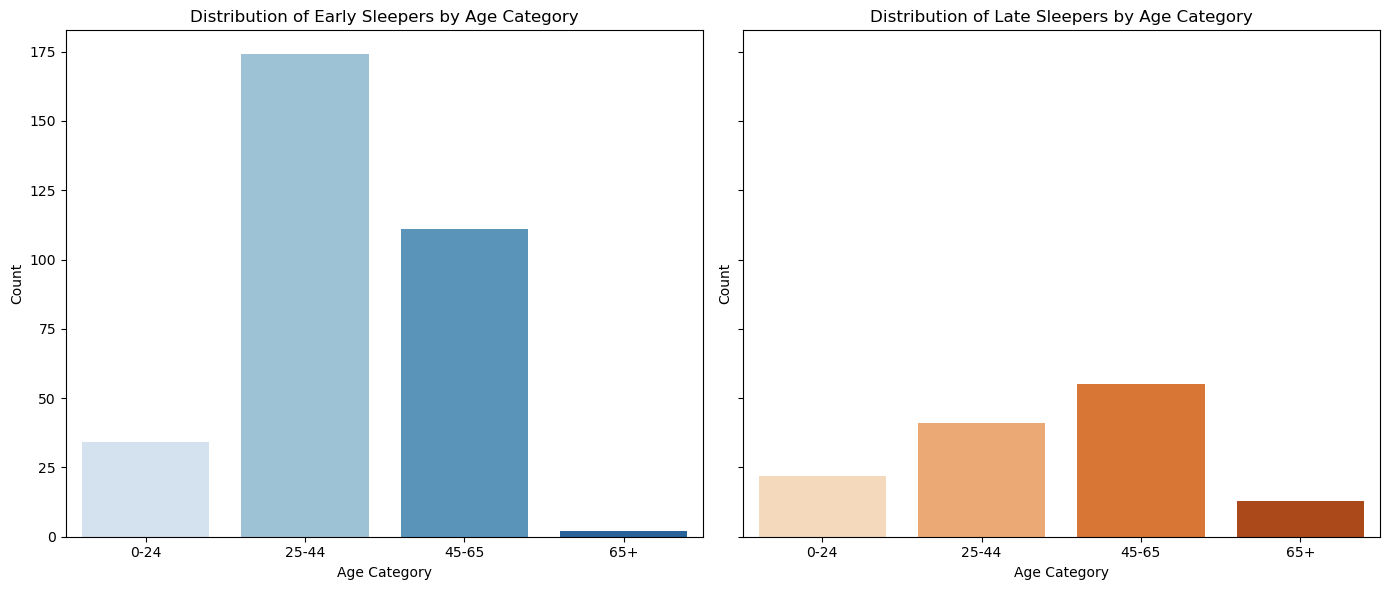

In [110]:
early_sleepers = Sleep_Efficiency[Sleep_Efficiency['Bedtime Category'] == 'Early']
late_sleepers = Sleep_Efficiency[Sleep_Efficiency['Bedtime Category'] == 'Late']

# Calculate the distribution within each age group for early sleepers
early_age_group_distribution = early_sleepers['Age Category'].value_counts().reindex(labels).reset_index()
early_age_group_distribution.columns = ['Age Category', 'Count']

# Calculate the distribution within each age group for late sleepers
late_age_group_distribution = late_sleepers['Age Category'].value_counts().reindex(labels).reset_index()
late_age_group_distribution.columns = ['Age Category', 'Count']

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for early sleepers
sns.barplot(data=early_age_group_distribution, x='Age Category', y='Count', palette="Blues", ax=axes[0])
axes[0].set_title('Distribution of Early Sleepers by Age Category')
axes[0].set_xlabel('Age Category')
axes[0].set_ylabel('Count')

# Plot for late sleepers
sns.barplot(data=late_age_group_distribution, x='Age Category', y='Count', palette="Oranges", ax=axes[1])
axes[1].set_title('Distribution of Late Sleepers by Age Category')
axes[1].set_xlabel('Age Category')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

We see that the age group 25-44 has the highest number of early sleepers, and the age group 45-65 have the highest number of late sleepers.

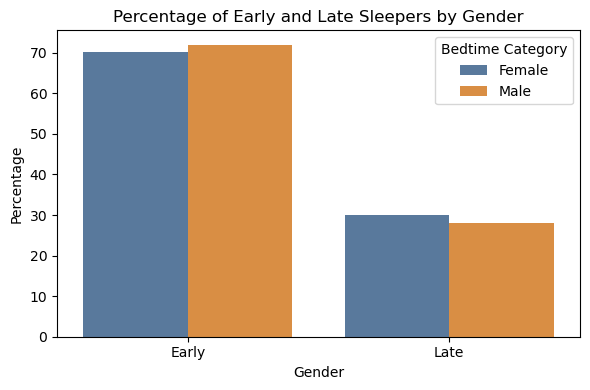

In [111]:
gender_distribution = Sleep_Efficiency.groupby(['Gender', 'Bedtime Category']).size().reset_index(name='Count')

total_counts = Sleep_Efficiency['Gender'].value_counts().reset_index()
total_counts.columns = ['Gender', 'Total']

gender_distribution = pd.merge(gender_distribution, total_counts, on='Gender')
gender_distribution['Percentage'] = (gender_distribution['Count'] / gender_distribution['Total']) * 100

plt.figure(figsize=(6, 4))
sns.barplot(data=gender_distribution, x='Bedtime Category', y='Percentage', hue='Gender', palette=['#4e79a7', '#f28e2b'])
plt.title('Percentage of Early and Late Sleepers by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Bedtime Category')
plt.tight_layout()
plt.show()

This shows us that from the "Early" sleepers we have a majority of Male and from the "Late" sleepers we have mojerity of Female

In [112]:
total_caffeine_consumption = Sleep_Efficiency['Caffeine consumption (Yes/No)'].value_counts().reset_index()
total_caffeine_consumption.columns = ['Caffeine consumption', 'Total Amount']

In [113]:
total_caffeine_consumption

,Caffeine consumption,Total Amount
0,No,236
1,Yes,216


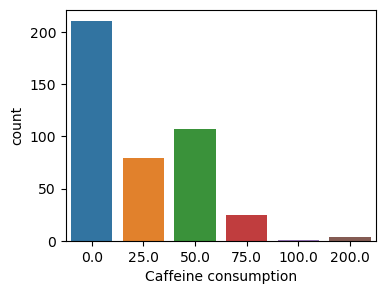

In [114]:
plt.figure(figsize=(4, 3))
sns.countplot(data=Sleep_Efficiency, x='Caffeine consumption')
plt.show()

In [115]:
total_Alcohol_consumption = Sleep_Efficiency['Alcohol consumption (Yes/No)'].value_counts().reset_index()
total_Alcohol_consumption.columns = ['Alcohol consumption', 'Total Amount']

In [116]:
total_Alcohol_consumption

,Alcohol consumption,Total Amount
0,No,260
1,Yes,192


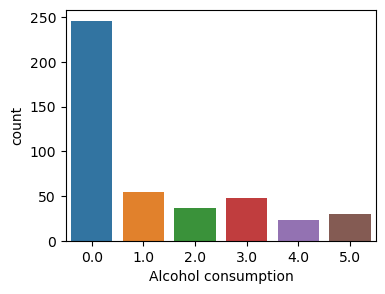

In [119]:
plt.figure(figsize=(4, 3))
sns.countplot(data=Sleep_Efficiency, x='Alcohol consumption')
plt.show()

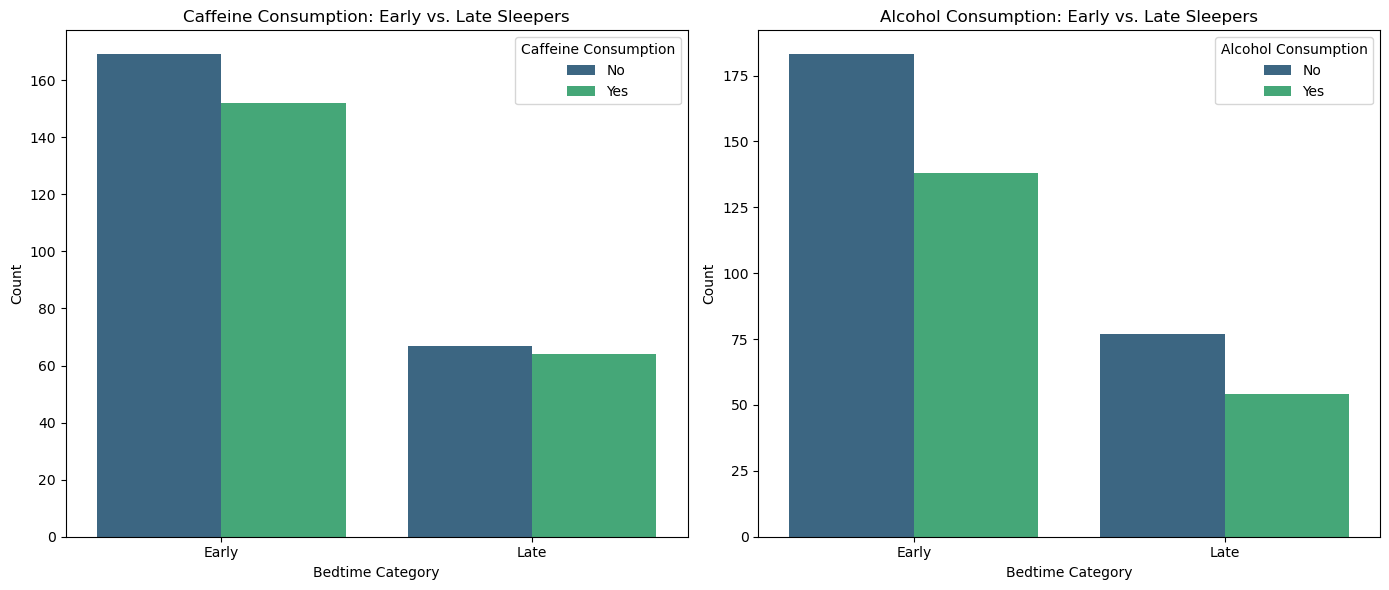

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=Sleep_Efficiency, x='Bedtime Category', hue='Caffeine consumption (Yes/No)', palette="viridis", order=['Early', 'Late'], ax=axes[0])
axes[0].set_title('Caffeine Consumption: Early vs. Late Sleepers')
axes[0].set_xlabel('Bedtime Category')
axes[0].set_ylabel('Count')
axes[0].legend(title='Caffeine Consumption')

sns.countplot(data=Sleep_Efficiency, x='Bedtime Category', hue='Alcohol consumption (Yes/No)', palette="viridis", order=['Early', 'Late'], ax=axes[1])
axes[1].set_title('Alcohol Consumption: Early vs. Late Sleepers')
axes[1].set_xlabel('Bedtime Category')
axes[1].set_ylabel('Count')
axes[1].legend(title='Alcohol Consumption')

plt.tight_layout()
plt.show()

Caffeine and alcohol consumption patterns are similar for both early and late sleepers, suggesting that these substances do not drastically alter sleep timing for the majority of individuals.

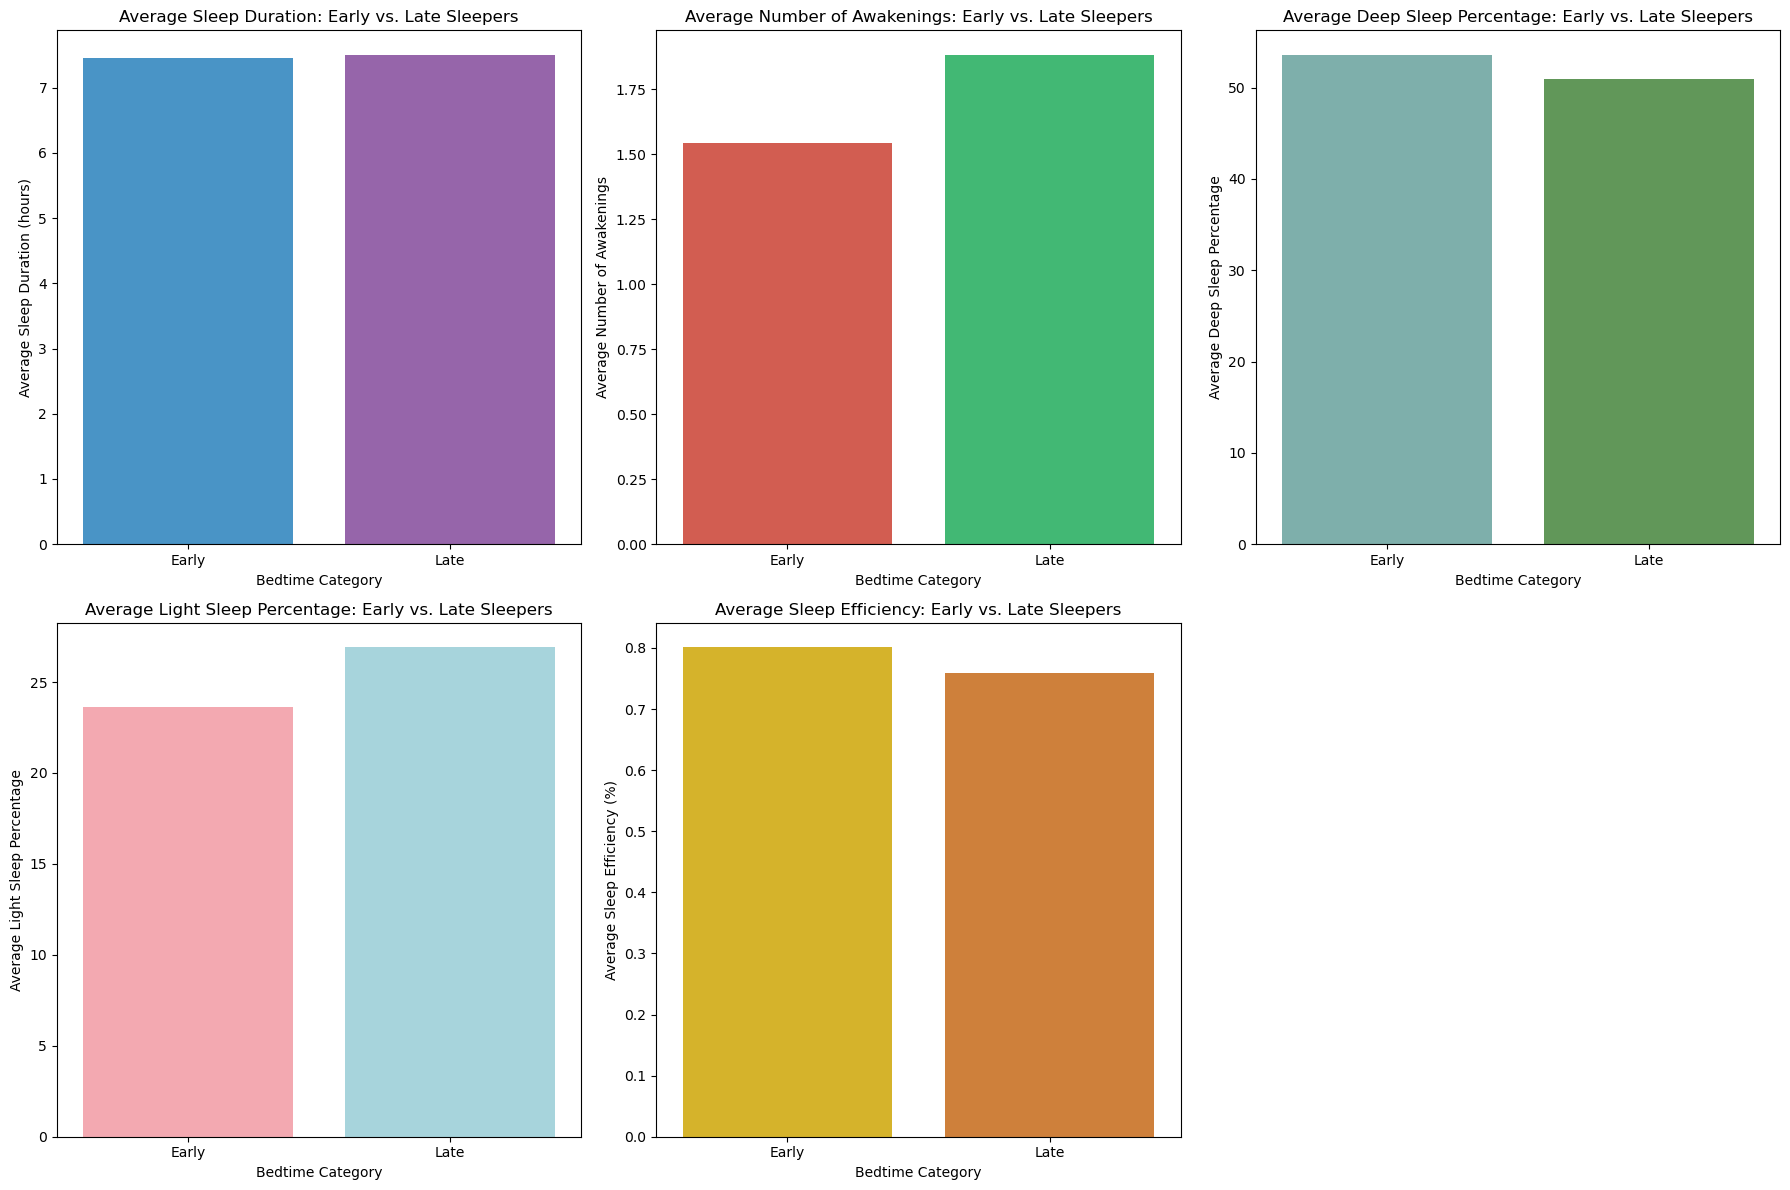

In [120]:
average_metrics = Sleep_Efficiency.groupby('Bedtime Category')[['Sleep duration', 'Awakenings', 'Sleep efficiency', 'Deep sleep percentage', 'Light sleep percentage']].mean().reset_index()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.barplot(data=average_metrics, x='Bedtime Category', y='Sleep duration', palette=["#3498db", "#9b59b6"], ax=axes[0, 0], order=['Early', 'Late'])
axes[0, 0].set_title('Average Sleep Duration: Early vs. Late Sleepers')
axes[0, 0].set_xlabel('Bedtime Category')
axes[0, 0].set_ylabel('Average Sleep Duration (hours)')

sns.barplot(data=average_metrics, x='Bedtime Category', y='Awakenings', palette=["#e74c3c", "#2ecc71"], ax=axes[0, 1], order=['Early', 'Late'])
axes[0, 1].set_title('Average Number of Awakenings: Early vs. Late Sleepers')
axes[0, 1].set_xlabel('Bedtime Category')
axes[0, 1].set_ylabel('Average Number of Awakenings')


sns.barplot(data=average_metrics, x='Bedtime Category', y='Deep sleep percentage', palette=["#76b7b2", "#59a14f"], ax=axes[0, 2], order=['Early', 'Late'])
axes[0, 2].set_title('Average Deep Sleep Percentage: Early vs. Late Sleepers')
axes[0, 2].set_xlabel('Bedtime Category')
axes[0, 2].set_ylabel('Average Deep Sleep Percentage')

sns.barplot(data=average_metrics, x='Bedtime Category', y='Light sleep percentage', palette=["#ff9da7", "#9edae5"], ax=axes[1, 0], order=['Early', 'Late'])
axes[1, 0].set_title('Average Light Sleep Percentage: Early vs. Late Sleepers')
axes[1, 0].set_xlabel('Bedtime Category')
axes[1, 0].set_ylabel('Average Light Sleep Percentage')


sns.barplot(data=average_metrics, x='Bedtime Category', y='Sleep efficiency', palette=["#f1c40f", "#e67e22"], ax=axes[1, 1], order=['Early', 'Late'])
axes[1, 1].set_title('Average Sleep Efficiency: Early vs. Late Sleepers')
axes[1, 1].set_xlabel('Bedtime Category')
axes[1, 1].set_ylabel('Average Sleep Efficiency (%)')

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

We observe that early and late sleepers have similar average sleep durations, suggesting that bedtime does not significantly impact the total amount of sleep.

However, when examining both "Awakenings" and "Sleep Efficiency," we find that late sleepers wake up more frequently on average and have lower sleep efficiency compared to early sleepers.

Regarding sleep stages, early sleepers spend a higher percentage of their sleep in deep sleep, while late sleepers spend a slightly higher percentage of their sleep in light sleep.

### <span style="color:red"> Observation 3:</span>

#### Based on these findings, it is recommended to go to bed early for improved sleep quality. Early sleepers not only experience fewer awakenings and higher sleep efficiency, but they also spend a greater percentage of their sleep in the restorative deep sleep stage.
#### In contrast, late sleepers tend to wake up more frequently and spend more time in light sleep, which may impact overall sleep quality.

<a id='top'></a>
<div>
<img src="https://github.com/RoidoAsh/project1/blob/main/we%20did%20it.jpg?raw=true" width="800"/>
</div>